In [1]:
import pandas as pd

PATH_DRIFT = '../data/Dumont-etal_2019/datasets/ISMER_20140706_spot072_drift.tab'

#ISMER_20150921_spot926_drift
# ISMER_20151013_spot057_drift (start from position 1)

drift_tab = pd.read_csv(PATH_DRIFT,sep='\t',skiprows=13)

In [2]:
drift_tab.head()

,Date/Time,Longitude,Latitude
0,2014-07-06T21:18:35,-58.79483,49.26101
1,2014-07-07T20:57:41,-58.41534,49.54770
2,2014-07-08T20:50:24,-58.19086,49.81187
3,2014-07-09T20:37:05,-57.89368,50.06958
4,2014-07-10T20:39:58,-57.44870,50.52789


In [3]:
drift_tab.tail()

,Date/Time,Longitude,Latitude
1,2014-07-07T20:57:41,-58.41534,49.54770
2,2014-07-08T20:50:24,-58.19086,49.81187
3,2014-07-09T20:37:05,-57.89368,50.06958
4,2014-07-10T20:39:58,-57.44870,50.52789
5,2014-07-11T20:34:31,-57.32019,50.67143


In [4]:
from datetime import datetime 
def convert_date(strdate):
    try:
        date_datetime = datetime.strptime(strdate,'%Y-%m-%dT%H:%M:%S')
    except:
        date_datetime = datetime.strptime(strdate,'%Y-%m-%dT%H:%M')
    reference = datetime(2000,1,1,0,0,0)
    duration = date_datetime-reference
    hours = duration.total_seconds()/3600
    return hours


In [5]:
drift_tab['hours'] = drift_tab['Date/Time'].apply(lambda x: convert_date(x))

In [6]:
drift_tab.head()

,Date/Time,Longitude,Latitude,hours
0,2014-07-06T21:18:35,-58.79483,49.26101,127221.309722
1,2014-07-07T20:57:41,-58.41534,49.54770,127244.961389
2,2014-07-08T20:50:24,-58.19086,49.81187,127268.840000
3,2014-07-09T20:37:05,-57.89368,50.06958,127292.618056
4,2014-07-10T20:39:58,-57.44870,50.52789,127316.666111


In [2]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

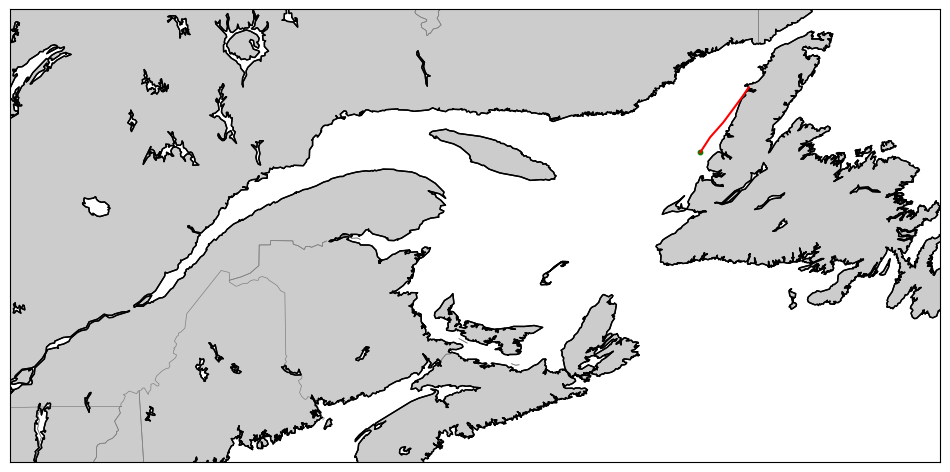

In [288]:
# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i')

# drawing the coastline
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()

# creating variable for latitude and longitude to list
lat = drift_tab['Latitude'].tolist()
lon = drift_tab['Longitude'].tolist()

# plotting the map
#m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = '.', alpha = 1)
m.plot(lon[1:],lat[1:],latlon=True,linewidth=1.5,color='r')
m.scatter(lon[1],lat[1], latlon=True,s=10,color='g',marker ='o',alpha=1)
#m.scatter(-60.23,49.1, latlon=True,s=50, marker='o', color='b',alpha = 1)
plt.show()


In [9]:
lon[1], lat[1]

(-59.92224, 48.01751)

### Draw all drift trajectories

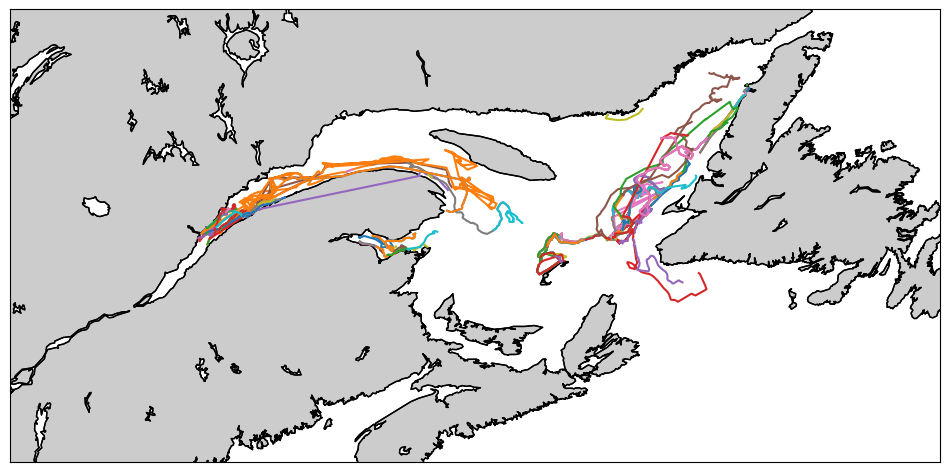

In [28]:
import os
import pandas as pd
# This is the path where all the files are stored.
FOLDER_PATH = '../data/Dumont-etal_2019/datasets'

# setting the size of the map
fig = plt.figure(figsize=(12,9))

# creating the map - setting latitude and longitude
m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i')

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='gray')
# m.drawstates(color='gray')
m.drawcoastlines()
m.fillcontinents()

# Open one of the files,
for data_file in os.listdir(FOLDER_PATH):
    data_file = os.path.join(FOLDER_PATH, data_file)
    drift_tab = pd.read_csv(data_file,sep='\t',skiprows=13)

    # creating variable for latitude and longitude to list
    lat = drift_tab['Latitude'].tolist()
    lon = drift_tab['Longitude'].tolist()

    # plotting the map
    #m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = '.', alpha = 1)
    m.plot(lon[1:-1],lat[1:-1],latlon=True,linewidth=1.5)
plt.savefig('map_multicolore.png')
plt.show()


## Check chunks

In [2]:
def get_time_continuous_path(drift_tab):

    list_df_ok = []
    idx_start = 0
    for i in range(1,len(drift_tab)):
        hours_diff = drift_tab['hours'].iloc[i]-drift_tab['hours'].iloc[i-1]
        if hours_diff > 6:
            list_df_ok.append(drift_tab.iloc[idx_start:i])
            idx_start = i
           
    return list_df_ok



In [3]:
import pandas as pd
from utils.read_data import read_drift_positions

PATH_DRIFT = '../data/Dumont-etal_2019/datasets/ISMER_20140706_spot073_drift.tab'

drift_tab = read_drift_positions(PATH_DRIFT)



In [4]:
list_df_ok = get_time_continuous_path(drift_tab)
print(len(list_df_ok))

3


In [5]:
def get_length_trace(drift_tab):
    print('len:', len(drift_tab))
    return drift_tab['hours'].iloc[-1]-drift_tab['hours'].iloc[0]

In [8]:
def get_24h_chunks(df):
    list_24h = []
    list_under_24h = []
    df['hours_since_start'] = df['hours']- df['hours'].iloc[0]
    nchunks = df['hours_since_start'].iloc[-1] // 24
    for i in range(int(nchunks)):
        cuthour = (i+1)*24
        prev_cuthour = i*24
        df_chunk = df.loc[(df['hours_since_start'] >= prev_cuthour) & (df['hours_since_start'] < cuthour)]
        df_chunk.drop(['hours_since_start'], axis = 1, inplace = True)
        list_24h.append(df_chunk)
    last_cuthour = nchunks*24
    df_chunk = df.loc[df['hours_since_start'] >= last_cuthour]
    df_chunk.drop(['hours_since_start'], axis = 1, inplace = True)
    list_under_24h.append(df_chunk)
    return list_24h, list_under_24h


In [9]:
list24 = []
listunder24 = []
for df in list_df_ok:
    l24h, lu24h = get_24h_chunks(df)
    list24 = list24 + l24h
    listunder24 = listunder24 + lu24h

print('24h chunks')
for df in list24:
    print('len:', len(df))
    print('hours:', get_length_trace(df))

print('Under 24h chunks')
for df in listunder24:
    print('len:', len(df))
    print('hours:', get_length_trace(df))

24h chunks
len: 268
len: 268
hours: 23.94833333333372
len: 194
len: 194
hours: 23.900277777778683
len: 118
len: 118
hours: 20.023611111100763
Under 24h chunks
len: 34
len: 34
hours: 8.803055555559695
len: 19
len: 19
hours: 1.719444444446708
len: 64
len: 64
hours: 7.991388888884103


C:\Users\manon\AppData\Local\Temp\ipykernel_19436\907157535.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hours_since_start'] = df['hours']- df['hours'].iloc[0]
C:\Users\manon\AppData\Local\Temp\ipykernel_19436\907157535.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chunk.drop(['hours_since_start'], axis = 1, inplace = True)
C:\Users\manon\AppData\Local\Temp\ipykernel_19436\907157535.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org

In [18]:
import os

SAVING_PATH_24 = '../data/Dumont-etal_2019/dataset6h'
SAVING_PATH_UNDER_24 = '../data/Dumont-etal_2019/datasetunder12h'


for data_file in os.listdir(SAVING_PATH_UNDER_24):
    data_file = os.path.join(SAVING_PATH_UNDER_24, data_file)
    drift_tab = pd.read_csv(data_file)
    print('Nhours: ', get_length_trace(drift_tab))
    

len: 93
Nhours:  9.808333333348855
len: 48
Nhours:  6.6913888888811925
len: 93
Nhours:  9.808333333348855
len: 34
Nhours:  8.803055555559695
len: 64
Nhours:  7.991388888884103
len: 34
Nhours:  8.803055555559695
len: 64
Nhours:  7.991388888884103
len: 65
Nhours:  8.217222222214332
len: 43
Nhours:  7.646944444437395
len: 4
Nhours:  7.873055555552128
len: 59
Nhours:  10.979166666656965
len: 107
Nhours:  10.675277777787414
len: 82
Nhours:  11.303888888884103
len: 118
Nhours:  9.580555555570754
len: 117
Nhours:  9.49833333332208
len: 4
Nhours:  9.201666666660458
len: 62
Nhours:  8.730555555550382
len: 27
Nhours:  11.820833333316841
len: 93
Nhours:  9.516666666677338
len: 61
Nhours:  11.125277777769952
len: 55
Nhours:  10.19638888888585
len: 15
Nhours:  10.924166666678502
len: 18
Nhours:  7.946666666684905
len: 4
Nhours:  9.548888888879446
len: 6
Nhours:  8.360277777755982
len: 17
Nhours:  8.299999999988358
len: 19
Nhours:  8.509444444440305
len: 6
Nhours:  8.360277777755982
len: 17
Nhours: 

In [19]:
for data_file in os.listdir(SAVING_PATH_24):
    data_file = os.path.join(SAVING_PATH_24, data_file)
    drift_tab = pd.read_csv(data_file)
    print('Nhours: ', get_length_trace(drift_tab))

len: 72
Nhours:  5.954722222217242
len: 58
Nhours:  5.384166666684905
len: 18
Nhours:  4.163055555531173
len: 5
Nhours:  0.3172222222201526
len: 37
Nhours:  2.9811111111048376
len: 12
Nhours:  1.3886111111205537
len: 10
Nhours:  2.038333333344781
len: 5
Nhours:  5.945555555532337
len: 15
Nhours:  2.3886111111205537
len: 36
Nhours:  5.307222222225391
len: 38
Nhours:  5.4638888888730435
len: 45
Nhours:  5.834722222207347
len: 62
Nhours:  5.8399999999965075
len: 47
Nhours:  5.951388888905058
len: 73
Nhours:  5.969444444446708
len: 9
Nhours:  5.874166666675592
len: 49
Nhours:  5.165555555562605
len: 16
Nhours:  4.009166666655801
len: 21
Nhours:  5.854166666656965
len: 64
Nhours:  5.911666666666861
len: 25
Nhours:  5.274166666669771
len: 15
Nhours:  3.0627777777554
len: 31
Nhours:  5.895277777774027
len: 21
Nhours:  5.945277777776937
len: 57
Nhours:  5.824444444428082
len: 20
Nhours:  3.631666666653473
len: 11
Nhours:  2.9627777777786832
len: 2
Nhours:  3.9747222222213168
len: 4
Nhours:  1.